In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
dataset = pd.read_csv('/Users/jeanlima/Documents/GitHub/ElectricCurrentRecognition/CreatingDataset/TimeDomain/ElectricCurrentDataset.txt')
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Device
0,0.0,1.66,1.84,2.09,1.66,1.24,0.71,0.00,0.60,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
1,0.0,1.31,1.13,1.59,1.74,1.56,1.35,1.03,0.64,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
2,0.0,0.96,1.74,1.70,2.02,1.66,1.06,0.53,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
3,0.0,1.24,2.27,2.02,1.95,1.56,1.13,0.67,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
4,0.0,1.70,1.77,1.98,1.81,1.13,0.78,0.71,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook


## Combinações de Correntes

In [57]:
classes=[]
for i in dataset['Device']:
    if i not in classes:
        classes.append(i)

#Transformando o Dataframe dataset em matriz
matrix_dataset = list(dataset.as_matrix())

#Transformando cada linha da matriz em um numpy array
for i in range(len(matrix_dataset)):
    matrix_dataset[i] = np.asarray(matrix_dataset[i])

#Dois a dois
for i in range(len(dataset)):
    for j in range(1, len(classes)):
        if i+(200*j)<len(dataset):
            matrix_dataset.append(matrix_dataset[i]+matrix_dataset[i+(200*j)])

#Três a três
num_classes = 4
for i in range(len(dataset)):
    for j in range(1, len(classes)):
        for k in range(1, num_classes):
            if i+(200*j)<len(dataset) and i+(200*(j+num_classes))<len(dataset):
                matrix_dataset.append(matrix_dataset[i] + matrix_dataset[i+(200*j)] + matrix_dataset[i+(200*(j+1))])

#Quatro a quatro
for i in range(200):
    matrix_dataset.append(matrix_dataset[i] + matrix_dataset[i+(200*1)] + matrix_dataset[i+(200*(2))] + matrix_dataset[i+(200*(3))])

#Novo dataset
new_dataset = pd.DataFrame(matrix_dataset)

/Users/jeanlima/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [54]:
pos = 2000
new_dataset.loc[pos][300]

'NotebookVentiladorLiquidificadorGeladeira'

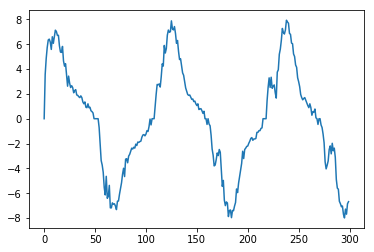

In [58]:
linha = list(new_dataset.loc[pos][:300])
plt.plot(linha)

/Users/jeanlima/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


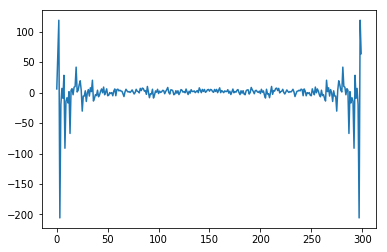

In [56]:
plt.plot(np.fft.fft(linha))